In [ ]:
import random
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [ ]:
# random library
# random float bw 0.0 & 1.0
print(random.random())

#random integer bw a & b, inclusive
print(random.randint(1,10))

#random float bw a & b, inclusive
print(random.uniform(1,10))

0.6040497395072973
8
5.712721535307745


## Discrete Uniform Distribution

In [ ]:
die_rolls = [random.randint(1,6) for x in range(1000)]

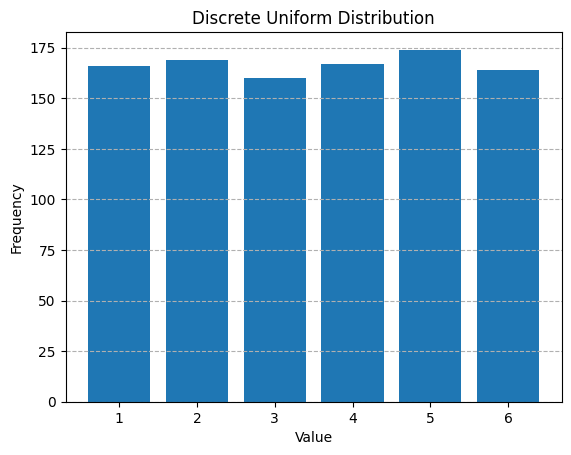

In [ ]:
plt.hist(die_rolls, bins = range(1,8), align = 'left', rwidth=0.8)
plt.title('Discrete Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y',linestyle='--')
plt.show()

## Continuous Uniform Distribution

In [ ]:
continous_val = [random.uniform(0,1) for x in range(1000)]

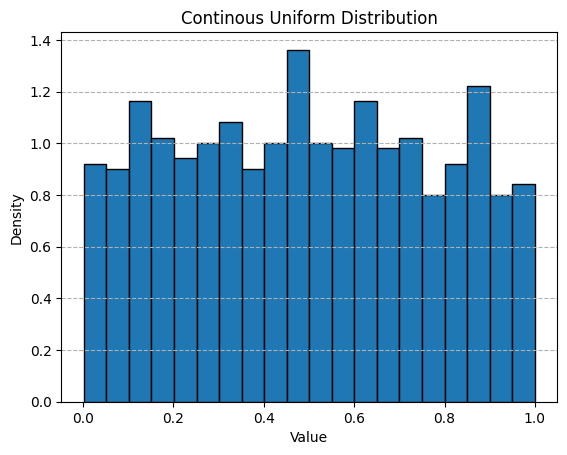

In [ ]:
plt.hist(continous_val, bins = 20, density = True, edgecolor='black')
plt.title('Continous Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y',linestyle='--')
plt.show()

## Bernoulli & Binominal Distribution

In [ ]:
from scipy.stats import bernoulli
p = 0.7
bernoulli_dist = bernoulli(p)

In [ ]:
x = [0,1]
pmf_val = bernoulli_dist.pmf(x)

In [ ]:
pmf_val

array([0.3, 0.7])

### Binomial Distribution
A binomial distribution models the number of successes in $n$ independent Bernoulli trials.

**Example**

- Count of total clicks (successes) across 20 emails is a Binomial random variable
- Each email interaction is a Bernoulli trial

The binomial probability for $k$ success out of $n$ trials is given as:
$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

In [ ]:
from scipy.stats import binom

In [ ]:
#input params
n = 20
p = 0.3

binom_dist = binom(n,p)
# Possible number of successes: 0 to n
x = list(range(n+1))
pmf_val = binom_dist.pmf(x)

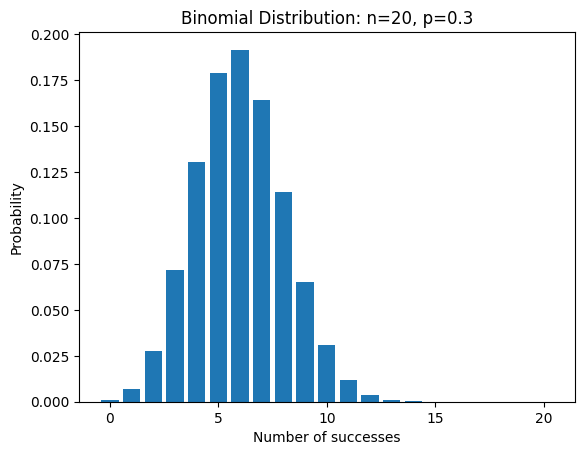

In [ ]:
# plot
plt.bar(x, pmf_val)
plt.title(f"Binomial Distribution: n={n}, p={p}")
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.show()

## Cummulative Distribution Function (CDF)

The **CDF**, denoted as $F(k) = \mathrm P(X \leq k)$, gives the **probability that a random variable $X$ takes a value less than or equal to $k$**.

- For discrete distributions, the CDF is the **sum of the PMF** up to $k$.
- For continuous distributions, it's the area under the PDF curve up to $k$

It accumulates probability from the left (starting from the lowest possible value)

- For **discrete variables**: CDF is a **step function**
- For **continuous variables**: CDF is a **smooth curve**


In [ ]:
#params:
n = 20
k = 3
p = 0.3

#CDF
prob = binom.cdf(k,n,p)
print(prob)

0.10708680450373087


In [ ]:
#discrete variables: change k from 1 -> n
n = 5
k = 0.3
x = list(range(n+1))
cdf_val = binom.cdf(x,n,p)
print(cdf_val)

[0.16807 0.52822 0.83692 0.96922 0.99757 1.     ]


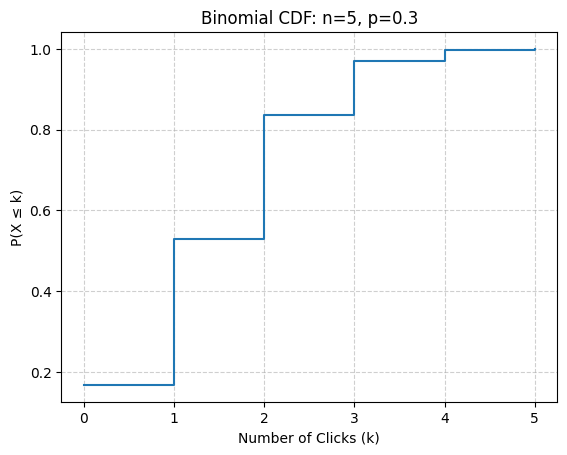

In [ ]:
#plot step change - discrete variables
plt.step(x,cdf_val, where = 'post')
plt.title(f"Binomial CDF: n={n}, p={p}")
plt.xlabel("Number of Clicks (k)")
plt.ylabel("P(X ≤ k)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Normal Distribution

### `scipy.stats.norm`

- `scipy.stats.norm` represents the **Normal (Gaussian) distribution**.
- It is a continuous distribution characterised by:
  - `loc`: the mean ($μ$)
  - `scale`: the standard deviation ($σ$)

Common methods:
- `.pdf(x)`: Probability Density Function
- `.cdf(x)`: Cumulative Distribution Function
- `.ppf(q)`: Percent Point Function (inverse of CDF)

In [ ]:
from scipy.stats import norm

In [ ]:
# Define parameters
mu = 165
sigma = 5

data = [norm.ppf(random.random(), loc = mu, scale = sigma) for x in range(10000)]

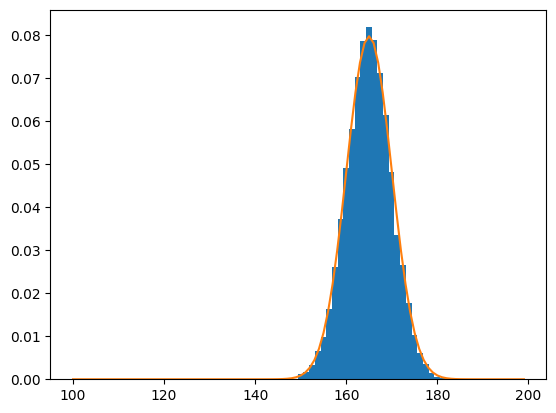

In [ ]:
#plot
plt.hist(data, bins=30, density = True)
# Display the theoretical PDF
x = [i for i in range(100, 200)]
pdf_val = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x, pdf_val)

plt.show()

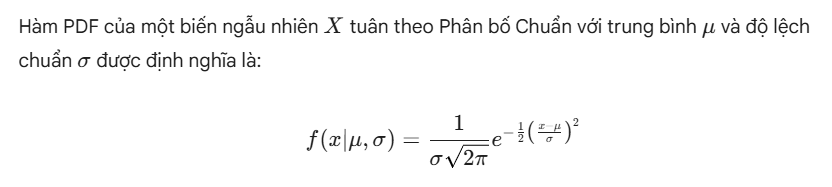

We can use the CDF to calculate the probability of a data point lying in between intervals.

**Q: What is the probability that a woman is between 160 and 170 cm tall?**


In [ ]:
#Example:

# P(160 ≤ X ≤ 170) = CDF(170) - CDF(160)
p = norm.cdf(170,mu,sigma) - norm.cdf(160,mu,sigma)
print(f"P(160 ≤ X ≤ 170) = {p:.4f}")

P(160 ≤ X ≤ 170) = 0.6827


In [ ]:
# What is the Z-score for a height of 172 cm?

x = 172
z = (x - mu) / sigma
print(f"Z-score for height {x} cm = {z:.2f}")

Z-score for height 172 cm = 1.40


In [ ]:
# What proportion of women is shorter than 172 cm?

# Use Z-score directly in norm.cdf if standard normal
z = (172 - mu) / sigma
p = norm.cdf(z)  # Standard normal
print(f"P(X < 172) = {p:.4f}")

P(X < 172) = 0.9192


In [ ]:
# Parameters
mu = 50
sigma = 10
n_samples = 5000

# Generate samples
data = [norm.rvs(loc=mu, scale=sigma) for _ in range(n_samples)]

In [ ]:
# Count within 1σ
within_1sigma = sum([1 for x in data if mu - sigma <= x <= mu + sigma])
within_2sigma = sum([1 for x in data if mu - 2*sigma <= x <= mu + 2*sigma])

print(f"Proportion within μ ± 1σ: {within_1sigma / n_samples:.4f}")
print(f"Proportion within μ ± 2σ: {within_2sigma / n_samples:.4f}")
TheoryP_OneSigma = norm.cdf(1) - norm.cdf(-1)
print(f"Theoretical Prob within μ ± 1σ: = {TheoryP_OneSigma:.4f}")
TheoryP_TwoSigma = norm.cdf(2) - norm.cdf(-2)
print(f"Theoretical Prob within μ ± 2σ: = {TheoryP_TwoSigma:.4f}")

Proportion within μ ± 1σ: 0.6848
Proportion within μ ± 2σ: 0.9560
Theoretical Prob within μ ± 1σ: = 0.6827
Theoretical Prob within μ ± 2σ: = 0.9545
